# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Load the dataset


In [60]:
df=pd.read_csv('/content/Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [61]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [62]:
df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high
6323,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


In [63]:
df.sample(10)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
2914,8:30:00 AM,9,Thursday,130,14,13,6,163,normal
6018,1:45:00 AM,16,Monday,19,4,0,17,40,normal
4025,10:15:00 PM,20,Friday,16,5,0,26,47,normal
3868,7:00:00 AM,19,Thursday,113,38,50,3,204,heavy
1640,2:00:00 AM,27,Friday,13,1,2,37,53,normal
4110,7:30:00 PM,21,Sunday,108,5,15,22,150,normal
4336,4:00:00 AM,24,Tuesday,10,1,0,12,23,low
4605,11:15:00 PM,26,Thursday,17,4,1,25,47,normal
3899,2:45:00 PM,19,Thursday,8,26,34,9,77,normal
311,5:45:00 AM,13,Friday,72,5,3,57,137,high


In [64]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [66]:
df['Day of the week'].value_counts()

,count
Day of the week,
Thursday,1020
Wednesday,1012
Tuesday,1011
Friday,832
Saturday,819
Sunday,816
Monday,814


In [67]:
label_encoder = LabelEncoder()
df['Day of the week'] = label_encoder.fit_transform(df['Day of the week'])
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])
df.drop(columns=['Time'], inplace=True)


In [68]:
correlation_matrix = df.corr()
print(correlation_matrix)

                       Date  Day of the week  CarCount  BikeCount  BusCount  \
Date               1.000000        -0.118882 -0.010507  -0.001985 -0.006166   
Day of the week   -0.118882         1.000000  0.013478  -0.087412  0.115630   
CarCount          -0.010507         0.013478  1.000000   0.705941  0.664491   
BikeCount         -0.001985        -0.087412  0.705941   1.000000  0.581289   
BusCount          -0.006166         0.115630  0.664491   0.581289  1.000000   
TruckCount         0.021137         0.022574 -0.583984  -0.585670 -0.533847   
Total             -0.006041         0.022747  0.971386   0.779261  0.763496   
Traffic Situation  0.009278         0.024173 -0.686521  -0.575332 -0.614372   

                   TruckCount     Total  Traffic Situation  
Date                 0.021137 -0.006041           0.009278  
Day of the week      0.022574  0.022747           0.024173  
CarCount            -0.583984  0.971386          -0.686521  
BikeCount           -0.585670  0.779261     

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [69]:
df.isnull().sum()

,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [70]:
numerical_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

# Standardize
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [71]:
X = df.drop(['Traffic Situation'], axis=1)
y = df['Traffic Situation']

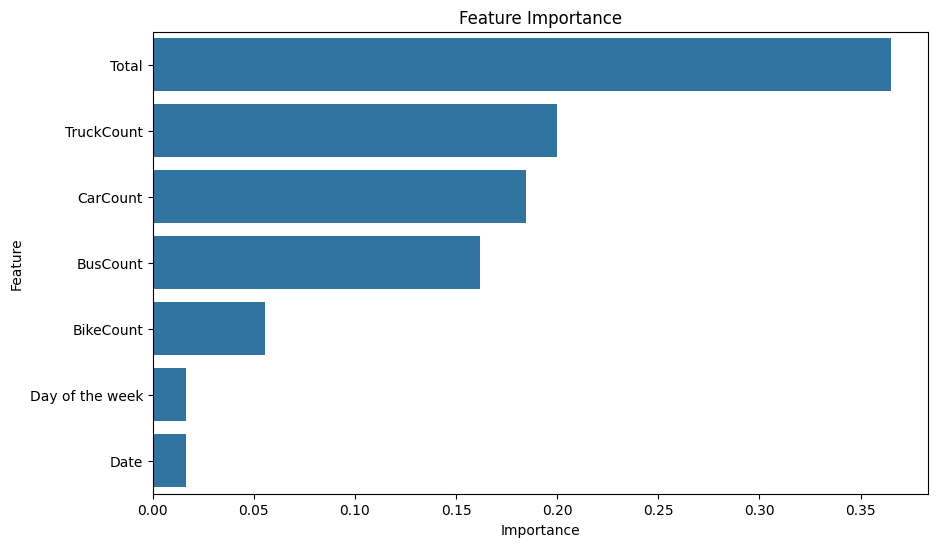

In [72]:
# Fit the model
model = RandomForestClassifier()
model.fit(X, y)
# Feature importance
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.show()

In [78]:
# Drop these features from the DataFrame
df = df.drop(['Date'], axis=1)
df = df.drop(['Day of the week'], axis=1)

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

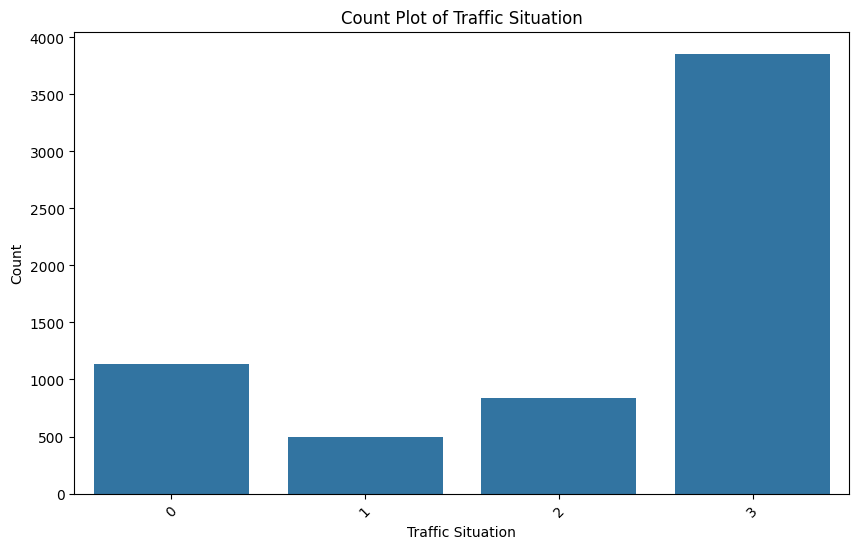

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Traffic Situation')
plt.title('Count Plot of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


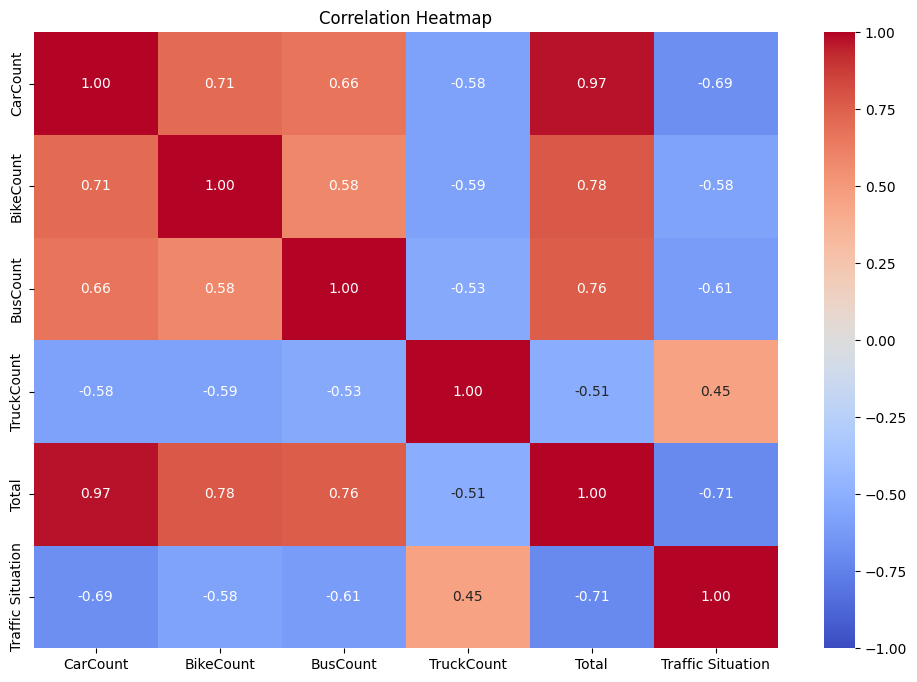

In [81]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [82]:
X = df.drop(['Traffic Situation'], axis=1)
y = df['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split( X,  y, test_size=0.2,  random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [84]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
base_estimator = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

### Evaluate the model performance

In [85]:
# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Bagging Model: {accuracy:.2f}")


Accuracy of the Bagging Model: 0.90


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [88]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
# Initialize the Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages to be run
    learning_rate=0.1,       # Step size for each boosting stage
    max_depth=3,             # Maximum depth of the individual trees
    random_state=42          # Seed for reproducibility
)
# Train the Gradient Boosting Classifier
boosting_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

### Evaluate the model performance

In [89]:
# Predict on the test set
y_pred = boosting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Boosting Model: {accuracy:.2f}")


Accuracy of the Boosting Model: 0.92


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [91]:
from sklearn.linear_model import LogisticRegression
# Initialize base models
base_models = [
    ('bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                  n_estimators=50,
                                  random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100,
                                                     learning_rate=0.1,
                                                     max_depth=3,
                                                     random_state=42)),
    ('decision_tree', DecisionTreeClassifier(max_depth=3, random_state=42))
]

# Initialize the meta-model
meta_model = LogisticRegression()


### Define meta-learner (LogisticRegression)

In [92]:
# Initialize base models
base_models = [
    ('bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                  n_estimators=50,
                                  random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100,
                                                     learning_rate=0.1,
                                                     max_depth=3,
                                                     random_state=42)),
    ('decision_tree', DecisionTreeClassifier(max_depth=3, random_state=42))
]

# Initialize the meta-model
meta_model = LogisticRegression()


### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [93]:
# Initialize the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models,
                                     final_estimator=meta_model,
                                     cv=5,  # Number of folds for cross-validation
                                     stack_method='auto',  # Method to stack base model predictions
                                     n_jobs=-1,  # Use all available cores
                                     verbose=1)  # Verbosity level


In [95]:
# Train the Stacking Classifier
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('bagging',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                  n_estimators=50,
                                                  random_state=42)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('decision_tree',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(), n_jobs=-1, verbose=1)

### Evaluate the model performance

In [96]:
# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Stacking Model: {accuracy:.2f}")


Accuracy of the Stacking Model: 0.96


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

Feature Selection and Engineering

Which features did you find most important for predicting churn, and why do you think they are significant? **I found that the most important feature is the number of cars. From the heat map, we find that the more cars there are, the more congestion there is.**
Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?**I didn't add new features but I did give up some to achieve its goal.**
Model Selection

Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?
**The most distinctive model is Stacking because it is considered one of the most powerful models for using more than one model.**
Model Evaluation

Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?
**I used the accuracy scale.**